In [1]:
import pandas as pd
df = pd.read_csv('batting.csv')
print(df.shape)
df.head()

(39095, 23)


playerID  yearID  stint teamID lgID   G     AB     R     H   2B  ...   SB  \
0   aasedo01    1985      1    BAL   AL  54    NaN   NaN   NaN  NaN  ...  NaN   
1  abregjo01    1985      1    CHN   NL   6    9.0   0.0   0.0  0.0  ...  0.0   
2  ackerji01    1985      1    TOR   AL  61    NaN   NaN   NaN  NaN  ...  NaN   
3  adamsri02    1985      1    SFN   NL  54  121.0  12.0  23.0  3.0  ...  1.0   
4  agostju01    1985      1    CHA   AL  54    0.0   0.0   0.0  0.0  ...  0.0   

    CS   BB    SO  IBB  HBP   SH   SF  GIDP  Salaries  
0  NaN  NaN   NaN  NaN  NaN  NaN  NaN   NaN         0  
1  0.0  0.0   2.0  0.0  0.0  0.0  0.0   0.0         0  
2  NaN  NaN   NaN  NaN  NaN  NaN  NaN   NaN    170000  
3  1.0  5.0  23.0  3.0  1.0  3.0  0.0   2.0         0  
4  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0    147500  

[5 rows x 23 columns]

I don't know a lot about baseball, so I don't know what these columns are. Let's see if we can't define them.

In [2]:
df.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', 'Salaries'],
      dtype='object')

Using the sidebar of <a href='http://m.mlb.com/glossary/standard-stats'>this website</a>, here are the definitions:
<ul>
    <li>G: Games Played</li>
    <li>AB: At-Bat</li>
    <li>R: Run</li>
    <li>H: Hit</li>
    <li>2B: Double</li>
    <li>3B: Triple</li>
    <li>HR: Home Run</li>
    <li>RBI: Runs Batted In</li>
    <li>SB: Stolen Base</li>
    <li>CS: Caught Stealing</li>
    <li>BB: Walk (I guess the b is silent in the baseball word for walk? Bbwalk or something?)</li>
    <li>SO: Strikeout</li>
    <li>IBB: Intentional Walk</li>
    <li>HBP: Hit By Pitch</li>
    <li>SH: Sacrifice Bunt</li>
    <li>SF: Sacrifice Fly</li>
    <li>GIDP: Ground Into Double Play</li>
</ul>

In [3]:
#Renaming:
columns = {
    'G': 'Games Played',
    'AB': 'At-Bat',
    'R': 'Run',
    'H': 'Hit',
    '2B': 'Double',
    '3B': 'Triple',
    'HR': 'Home Run',
    'RBI': 'Runs Batted In',
    'SB': 'Stolen Base',
    'CS': 'Caught Stealing',
    'BB': 'Walk',
    'SO': 'Strikeout',
    'IBB': 'Intentional Walk',
    'HBP': 'Hit By Pitch',
    'SH': 'Sacrifice Bunt',
    'SF': 'Sacrifice Fly',
    'GIDP': 'Ground Into Double Play',
    'Salaries': 'Target' #Rename target variable!
}

df.rename(columns=columns,inplace=True)
df.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'Games Played',
       'At-Bat', 'Run', 'Hit', 'Double', 'Triple', 'Home Run',
       'Runs Batted In', 'Stolen Base', 'Caught Stealing', 'Walk', 'Strikeout',
       'Intentional Walk', 'Hit By Pitch', 'Sacrifice Bunt', 'Sacrifice Fly',
       'Ground Into Double Play', 'Target'],
      dtype='object')

Great, those look a lot more understandable. Now for some missing value checking:

In [4]:
full = len(df)
nas = []
for i,col in enumerate(df.columns):
    entry = {}
    missing = sum(df[col].isnull())
    entry['column'] = col
    entry['missing'] = missing
    entry['percent'] = round(missing / full * 100,2)
    nas.append(entry)

pd.DataFrame(nas).sort_values(['missing','column'], ascending=False).reset_index().drop('index', axis=1)

column  missing  percent
0                      Walk     3113     7.96
1                    Triple     3113     7.96
2                 Strikeout     3113     7.96
3               Stolen Base     3113     7.96
4             Sacrifice Fly     3113     7.96
5            Sacrifice Bunt     3113     7.96
6            Runs Batted In     3113     7.96
7                       Run     3113     7.96
8          Intentional Walk     3113     7.96
9                  Home Run     3113     7.96
10             Hit By Pitch     3113     7.96
11                      Hit     3113     7.96
12  Ground Into Double Play     3113     7.96
13                   Double     3113     7.96
14          Caught Stealing     3113     7.96
15                   At-Bat     3113     7.96
16                   yearID        0     0.00
17                   teamID        0     0.00
18                    stint        0     0.00
19                 playerID        0     0.00
20                     lgID        0     0.00
21                   Target        0     0.00
22             Games Played        0     0.00

It's only < 8%, maybe there's a pattern to it somehow? It seems highly likely that all rows missing any stats are missing all their stats. Repeating the above for a subset (where one column is null), this is what we get:

In [5]:
missing_df = df[df.Double.isnull()]

full = len(missing_df)
nas = []
for i,col in enumerate(missing_df.columns):
    entry = {}
    missing = sum(df[col].isnull())
    entry['column'] = col
    entry['missing'] = missing
    entry['percent'] = round(missing / full * 100,2)
    nas.append(entry)

pd.DataFrame(nas).sort_values(['missing','column'], ascending=False).reset_index().drop('index', axis=1)

column  missing  percent
0                      Walk     3113    100.0
1                    Triple     3113    100.0
2                 Strikeout     3113    100.0
3               Stolen Base     3113    100.0
4             Sacrifice Fly     3113    100.0
5            Sacrifice Bunt     3113    100.0
6            Runs Batted In     3113    100.0
7                       Run     3113    100.0
8          Intentional Walk     3113    100.0
9                  Home Run     3113    100.0
10             Hit By Pitch     3113    100.0
11                      Hit     3113    100.0
12  Ground Into Double Play     3113    100.0
13                   Double     3113    100.0
14          Caught Stealing     3113    100.0
15                   At-Bat     3113    100.0
16                   yearID        0      0.0
17                   teamID        0      0.0
18                    stint        0      0.0
19                 playerID        0      0.0
20                     lgID        0      0.0
21                   Target        0      0.0
22             Games Played        0      0.0

Perfect. Those missing any stats are missing all of the stats that have missing values. 

In [6]:
missing_df.yearID.describe()

count    3113.000000
mean     1991.555413
std         3.995848
min      1985.000000
25%      1988.000000
50%      1992.000000
75%      1995.000000
max      1999.000000
Name: yearID, dtype: float64

In [7]:
df.yearID.describe()

count    39095.000000
mean      2000.975675
std          8.798696
min       1985.000000
25%       1994.000000
50%       2001.000000
75%       2009.000000
max       2015.000000
Name: yearID, dtype: float64

I think the best thing to do with this data is drop it, since all the missing values are between 1985 and 1999, and, although year is most likely important, we're more interested in calculating the salaries for recent years (and future years), so the data from fifteen years ago is probably not terribly important (plus, there's not actually that much missing). 

In [8]:
df.dropna(inplace=True)
print(df.shape)
df.head()

(35982, 23)


playerID  yearID  stint teamID lgID  Games Played  At-Bat   Run   Hit  \
1  abregjo01    1985      1    CHN   NL             6     9.0   0.0   0.0   
3  adamsri02    1985      1    SFN   NL            54   121.0  12.0  23.0   
4  agostju01    1985      1    CHA   AL            54     0.0   0.0   0.0   
5  aguaylu01    1985      1    PHI   NL            91   165.0  27.0  46.0   
6  aguilri01    1985      1    NYN   NL            22    36.0   1.0  10.0   

   Double  ...  Stolen Base  Caught Stealing  Walk  Strikeout  \
1     0.0  ...          0.0              0.0   0.0        2.0   
3     3.0  ...          1.0              1.0   5.0       23.0   
4     0.0  ...          0.0              0.0   0.0        0.0   
5     7.0  ...          1.0              0.0  22.0       26.0   
6     2.0  ...          0.0              0.0   1.0        5.0   

   Intentional Walk  Hit By Pitch  Sacrifice Bunt  Sacrifice Fly  \
1               0.0           0.0             0.0            0.0   
3               3.0           1.0             3.0            0.0   
4               0.0           0.0             0.0            0.0   
5               5.0           6.0             4.0            3.0   
6               0.0           0.0             7.0            0.0   

   Ground Into Double Play  Target  
1                      0.0       0  
3                      2.0       0  
4                      0.0  147500  
5                      7.0  237000  
6                      1.0       0  

[5 rows x 23 columns]

It's a little weird that some of the players have zero salary.

In [9]:
zero_df = df[df.Target == 0]
print('Salaries that are zero: ' + str(round(len(zero_df) / len(df) * 100,2)) + '%')
zero_df.head()

Salaries that are zero: 30.24%


playerID  yearID  stint teamID lgID  Games Played  At-Bat   Run   Hit  \
1  abregjo01    1985      1    CHN   NL             6     9.0   0.0   0.0   
3  adamsri02    1985      1    SFN   NL            54   121.0  12.0  23.0   
6  aguilri01    1985      1    NYN   NL            22    36.0   1.0  10.0   
7  aikenwi01    1985      1    TOR   AL            12    20.0   2.0   4.0   
9  allenga01    1985      1    TOR   AL            14    34.0   2.0   4.0   

   Double  ...  Stolen Base  Caught Stealing  Walk  Strikeout  \
1     0.0  ...          0.0              0.0   0.0        2.0   
3     3.0  ...          1.0              1.0   5.0       23.0   
6     2.0  ...          0.0              0.0   1.0        5.0   
7     1.0  ...          0.0              0.0   3.0        6.0   
9     1.0  ...          0.0              0.0   0.0       10.0   

   Intentional Walk  Hit By Pitch  Sacrifice Bunt  Sacrifice Fly  \
1               0.0           0.0             0.0            0.0   
3               3.0           1.0             3.0            0.0   
6               0.0           0.0             7.0            0.0   
7               0.0           0.0             0.0            1.0   
9               0.0           0.0             0.0            0.0   

   Ground Into Double Play  Target  
1                      0.0       0  
3                      2.0       0  
6                      1.0       0  
7                      1.0       0  
9                      1.0       0  

[5 rows x 23 columns]

In [10]:
# What are the years with zero salaries?
zero_df.yearID.describe()

count    10882.000000
mean      2003.152454
std          8.730692
min       1985.000000
25%       1998.000000
50%       2005.000000
75%       2010.000000
max       2015.000000
Name: yearID, dtype: float64

In [11]:
# How do salaries look in general?
df.Target.describe()

count    3.598200e+04
mean     1.504373e+06
std      3.015457e+06
min      0.000000e+00
25%      0.000000e+00
50%      3.500000e+05
75%      1.328750e+06
max      3.300000e+07
Name: Target, dtype: float64

In [12]:
# What's the next value after zero for salaries?
df[df.Target != 0].Target.describe()

count    2.510000e+04
mean     2.156588e+06
std      3.410096e+06
min      1.090000e+04
25%      3.160000e+05
50%      6.500000e+05
75%      2.500000e+06
max      3.300000e+07
Name: Target, dtype: float64

Still low (~10,000), but not zero. 25 percentile here is 316,000, which is a lot more understandable. These zeros will probably hurt our K Nearest Neighbors regressor, so we'll drop them.

In [13]:
df = df[df.Target != 0]

In [14]:
#Let's run a model! We're doing K Nearest Neighbors.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

id_variables = [
    'teamID',
    'playerID',
    'lgID'
]
temp = df.drop(id_variables, axis=1)

x = temp.drop('Target', axis=1)
y = temp['Target']

knr = KNeighborsRegressor()

In [15]:
from statistics import mean

In [16]:
r2_scores = cross_val_score(knr,x,y=y,scoring='r2',cv=5)
print('R^2: ' + str(mean(r2_scores)))
mse = cross_val_score(knr,x,y=y,scoring='neg_mean_squared_error',cv=5)
print('MSE: ' + str(mean(mse)))

R^2: -0.6864351285704726
MSE: -10229424851843.377


Wow, that's really bad. It's also understandable, given that we didn't look at all at correlated variables (a big problem in k nearest neighbors) or at scaling the data. Let's do both of those and see what happens.

In [17]:
# A useful function I got from https://ajh1143.github.io/Corr/
import matplotlib.pyplot as plt
import seaborn as sns
def heatMap(df, size=20):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(size, size))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

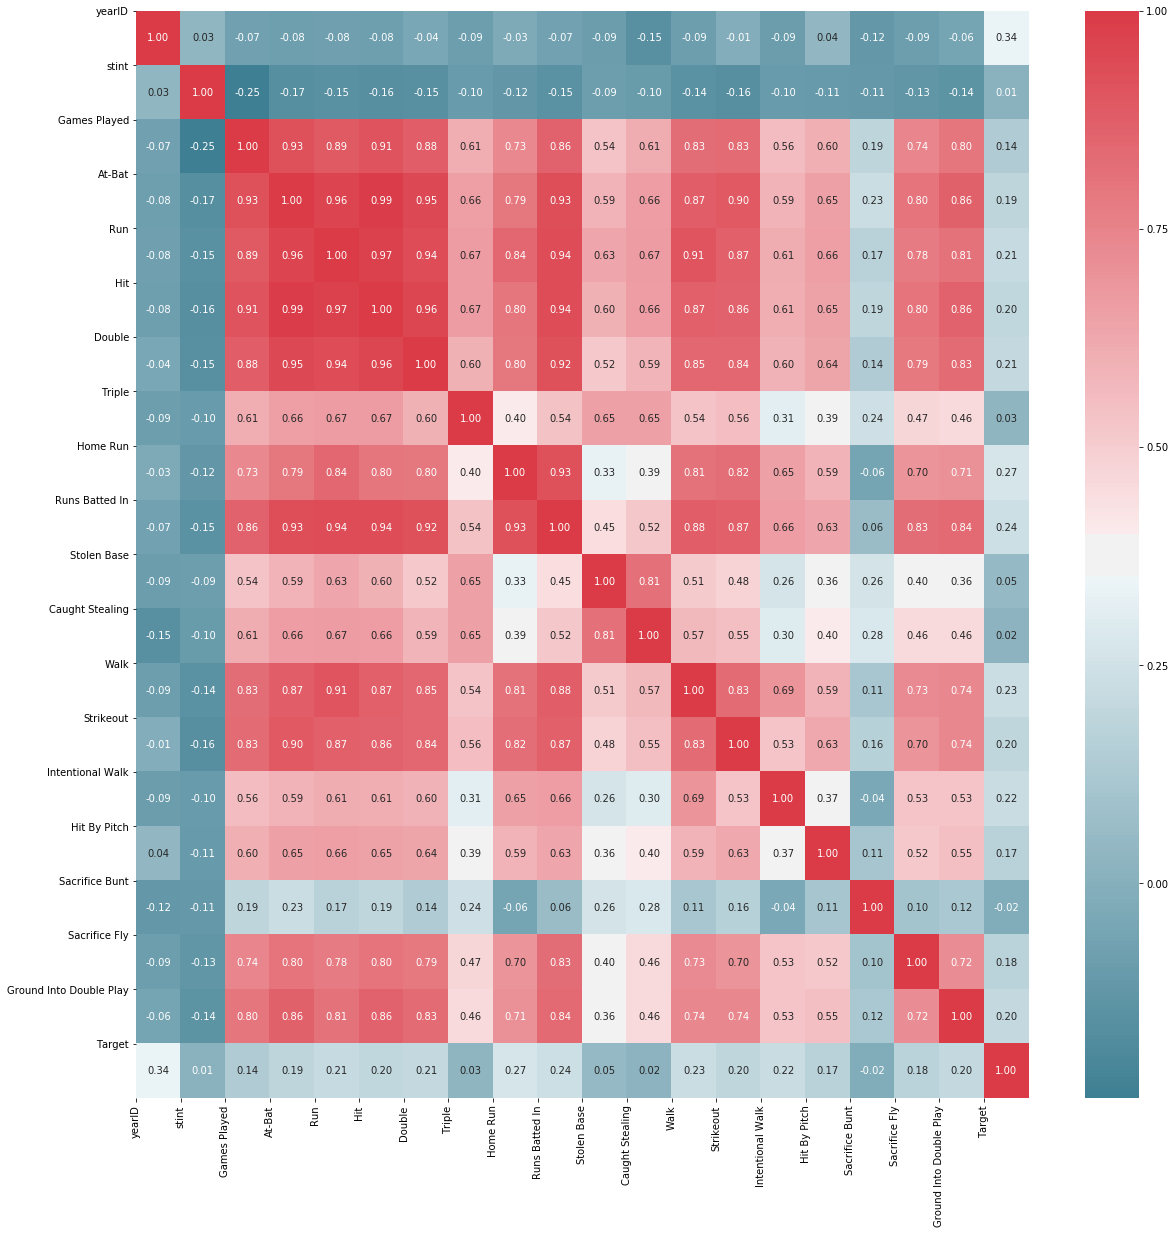

In [18]:
heatMap(df)

That darker red section in the top left looks like it's the biggest problem spot. In particular, At-Bat, Run, and Hit are almost all perfectly correlated with each other. We'll calculate batting average (Hit / At-Bat) and drop Run. The MLB also says <a href='http://m.mlb.com/glossary/standard-stats/runs-batted-in'>here</a> that Runs Batted In is highly predicated on circumstance, so we'll drop it, too.

In [19]:
df['Batting Average'] = df['Hit'] / df['At-Bat']
df.loc[df['At-Bat'] == 0, 'Batting Average'] = 0
df1 = df.drop(['Hit','Run','At-Bat', 'Runs Batted In'], axis=1)

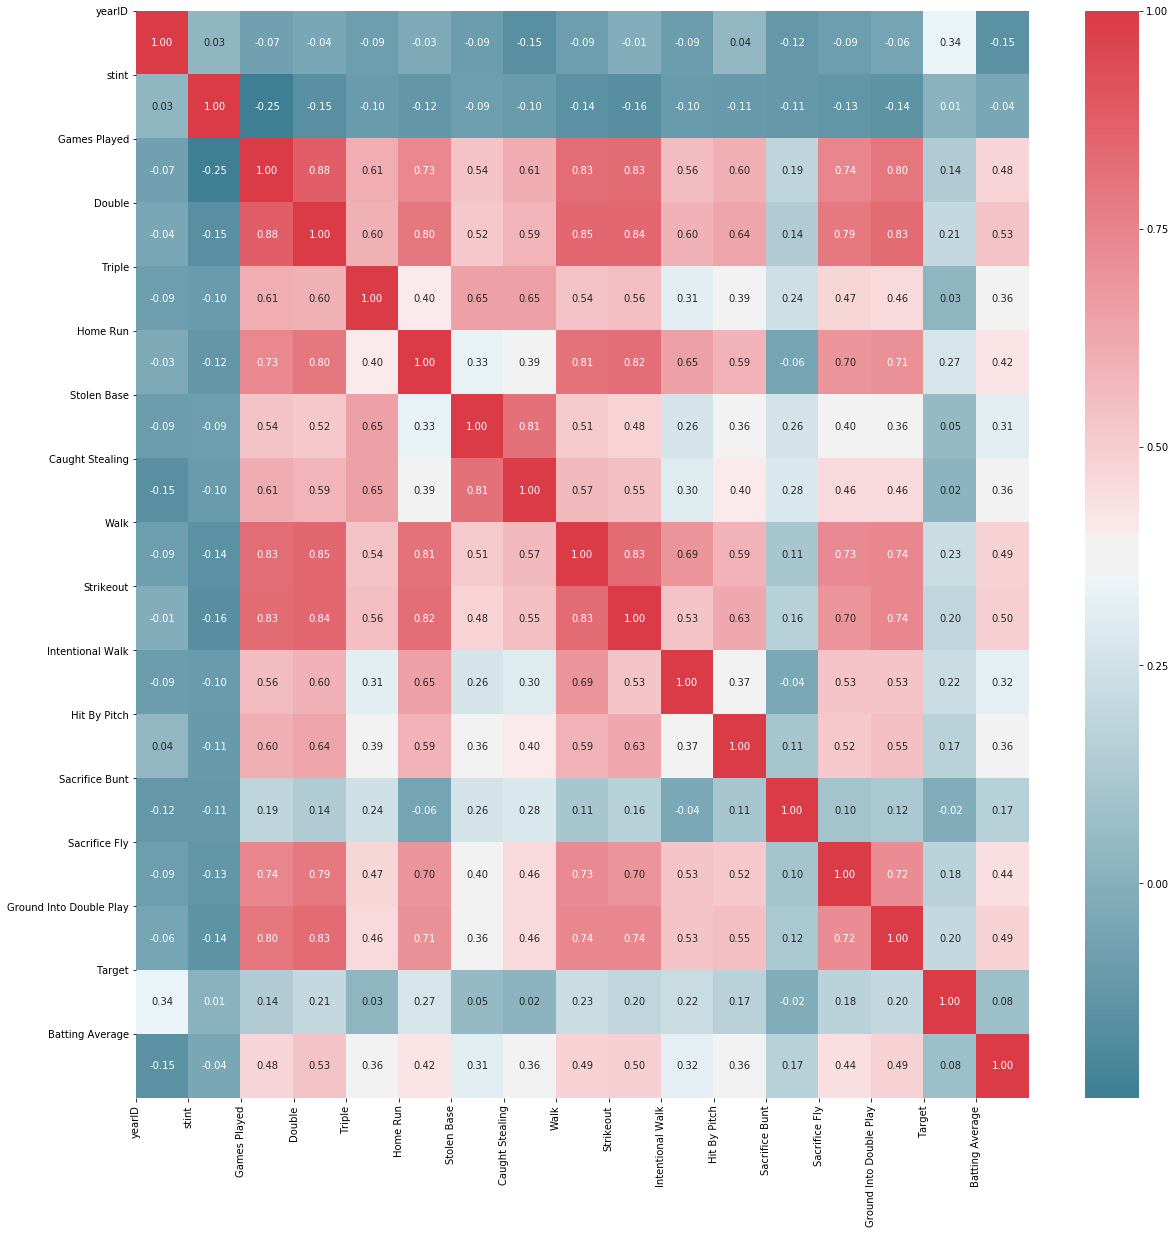

In [20]:
heatMap(df1)

That looks a lot better. Let's scale it now and run it again.

In [21]:
from sklearn.preprocessing import scale
scaled_df = scale(df1.drop(id_variables, axis=1)) # int converted to float is fine, we'll leave the warning
scaled_df = pd.DataFrame(scaled_df, columns = df1.drop(id_variables, axis=1).columns)

C:\Users\garrett.bergeson\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [22]:
x2 = scaled_df.drop('Target', axis=1)
y2 = scaled_df.Target

r2_scores = cross_val_score(knr,x2,y=y2,scoring='r2',cv=5)
print('R^2: ' + str(mean(r2_scores)))
mse = cross_val_score(knr,x2,y=y2,scoring='neg_mean_squared_error',cv=5)
print('MSE: ' + str(mean(mse))) # Will be way smaller this time because we scaled the data

R^2: -0.3767551431226955
MSE: -0.8594143180234557


Still not great. Looking back through the data, there are a few things that don't really seem to be at all relevant to a player's natural ability (rather, more the other team's), like intentional walk, walk, and hit by pitch. There are also some that seem to represent their team playing ability, like sacrifice fly and sacrifice bunt, and then a few more that represent things they're bad at, like strikeout and ground into double play. Let's do some feature engineering!

In [23]:
df1['Sacrifice'] = df['Sacrifice Bunt'] + df['Sacrifice Fly']
df1['Bad Things'] = df['Strikeout'] + df['Ground Into Double Play']
df1.drop(['Intentional Walk','Walk','Hit By Pitch','Sacrifice Bunt','Sacrifice Fly','Strikeout','Ground Into Double Play'], axis=1, inplace=True)

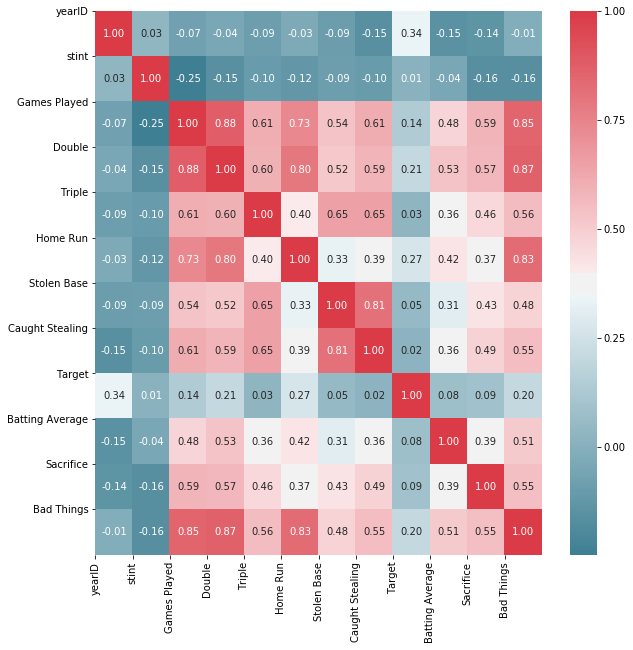

In [24]:
heatMap(df1, size=10)

In [25]:
scaled_df = scale(df1.drop(id_variables, axis=1)) # int converted to float is fine, we'll leave the warning
scaled_df = pd.DataFrame(scaled_df, columns = df1.drop(id_variables, axis=1).columns)

C:\Users\garrett.bergeson\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [27]:
x3 = scaled_df.drop('Target', axis=1)
y3 = scaled_df.Target

r2_scores = cross_val_score(knr,x3,y=y3,scoring='r2',cv=5)
print('R^2: ' + str(mean(r2_scores)))
mse = cross_val_score(knr,x3,y=y3,scoring='neg_mean_squared_error',cv=5)
print('MSE: ' + str(mean(mse)))

R^2: -0.22561730603351335
MSE: -0.8847072090861421


Slowly getting better! The MSE came back up a bit, though, which is not the best thing ever. 

One thing I'm learning is that salary doesn't really depend on batting performance. That's especially apparent from the heatmap, where the highest correlation with salary is .34, and that's with the year variable! 

Another thing to consider is that I'm dropping the team variables, and teams like the Yankees are going to pay a lot more than teams like the A's. Let's add them back in but as binary variables (since converting them to numbers won't make sense for KNN). 

In [32]:
df2 = pd.get_dummies(df1, columns=['teamID'])
df2.head()

playerID  yearID  stint lgID  Games Played  Double  Triple  Home Run  \
4   agostju01    1985      1   AL            54     0.0     0.0       0.0   
5   aguaylu01    1985      1   NL            91     7.0     3.0       6.0   
10  allenne01    1985      1   NL            23     0.0     0.0       0.0   
12  almonbi01    1985      1   NL            88    17.0     0.0       6.0   
14  anderla02    1985      1   NL            57     0.0     0.0       0.0   

    Stolen Base  Caught Stealing  ...  teamID_PHI  teamID_PIT  teamID_SDN  \
4           0.0              0.0  ...           0           0           0   
5           1.0              0.0  ...           1           0           0   
10          0.0              0.0  ...           0           0           0   
12         10.0              7.0  ...           0           1           0   
14          0.0              0.0  ...           1           0           0   

    teamID_SEA  teamID_SFN  teamID_SLN  teamID_TBA  teamID_TEX  teamID_TOR  \
4            0           0           0           0           0           0   
5            0           0           0           0           0           0   
10           0           0           1           0           0           0   
12           0           0           0           0           0           0   
14           0           0           0           0           0           0   

    teamID_WAS  
4            0  
5            0  
10           0  
12           0  
14           0  

[5 rows x 49 columns]

In [33]:
scaled_df = scale(df2.drop(['lgID','playerID'], axis=1)) # int converted to float is fine, we'll leave the warning
scaled_df = pd.DataFrame(scaled_df, columns = df2.drop(['lgID','playerID'], axis=1).columns)

x4 = scaled_df.drop('Target', axis=1)
y4 = scaled_df.Target

r2_scores = cross_val_score(knr,x4,y=y4,scoring='r2',cv=5)
print('R^2: ' + str(mean(r2_scores)))
mse = cross_val_score(knr,x4,y=y4,scoring='neg_mean_squared_error',cv=5)
print('MSE: ' + str(mean(mse)))

C:\Users\garrett.bergeson\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


R^2: -0.4091547185180956
MSE: -0.8622545473948058


Hm. Didn't help. Maybe the way I've scaled it has something to do with it? Let's try different scalings.

In [ ]:
# Scalings to try: StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
# https://scikit-learn.org/stable/modules/preprocessing.html


scaled_df = scale(df1.drop(id_variables, axis=1)) # int converted to float is fine, we'll leave the warning
scaled_df = pd.DataFrame(scaled_df, columns = df1.drop(id_variables, axis=1).columns)

x3 = scaled_df.drop('Target', axis=1)
y3 = scaled_df.Target

r2_scores = cross_val_score(knr,x3,y=y3,scoring='r2',cv=5)
print('R^2: ' + str(mean(r2_scores)))
mse = cross_val_score(knr,x3,y=y3,scoring='neg_mean_squared_error',cv=5)
print('MSE: ' + str(mean(mse)))